<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('G:\\machine_learning\\case_study\\Case Study 3Facebook Friend Recommendation using Graph Mining\\assignment\\FacebookRecruiting\\storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('G:\\machine_learning\\case_study\\Case Study 3Facebook Friend Recommendation using Graph Mining\\assignment\\FacebookRecruiting\\storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'prefer_Attach_followers', 'prefer_Attach_followees', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6', 'svd_dot'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9382940108892922 test Score 0.8853754940711462
Estimators =  50 Train Score 0.9951969260326609 test Score 0.3215434083601286
Estimators =  100 Train Score 0.9913875598086125 test Score 0.32911392405063294
Estimators =  250 Train Score 0.9894937917860555 test Score 0.32911392405063294
Estimators =  450 Train Score 0.9894937917860555 test Score 0.32911392405063294


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

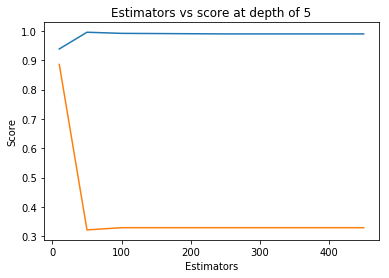

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9894937917860555 test Score 0.3258785942492013
depth =  9 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  11 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  15 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  20 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  35 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  50 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  70 Train Score 0.9913875598086125 test Score 0.3258785942492013
depth =  130 Train Score 0.9913875598086125 test Score 0.3258785942492013


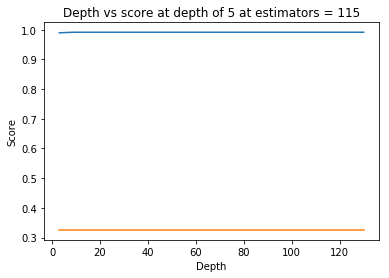

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.98952346 0.99525606 0.98567731 0.98952346 0.99525606]
mean train scores [0.98949725 0.99519766 0.98794984 0.98991494 0.99519766]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=33, min_samples_split=138,
                       min_weight_fraction_leaf=0.0, n_estimators=109,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [10]:
# Optimal value of depth
optimal_depth_ran = rf_random.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth_ran)

"""
optimal_learning_rate = clf.best_estimator_.learning_rate
print("\nThe optimal value of learning rate is : ",optimal_learning_rate)


optimal_reg_lambda = clf.best_estimator_.reg_lambda
print("\nThe optimal value of learning rate is : ",optimal_reg_lambda)
"""
#optimal_learners_data = optimal_learners
optimal_depth_data_ran = optimal_depth_ran
#optimal_learning_rate_data = optimal_learning_rate
#optimal_reg_lambda_data = optimal_reg_lambda



The optimal value of depth is :  12


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=optimal_depth_ran, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [12]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [13]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))


ran_train_f1_score = f1_score(y_train,y_train_pred)
ran_test_f1_score = f1_score(y_test,y_test_pred)

Train f1 score 0.9951969260326609
Test f1 score 0.3215434083601286


In [14]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


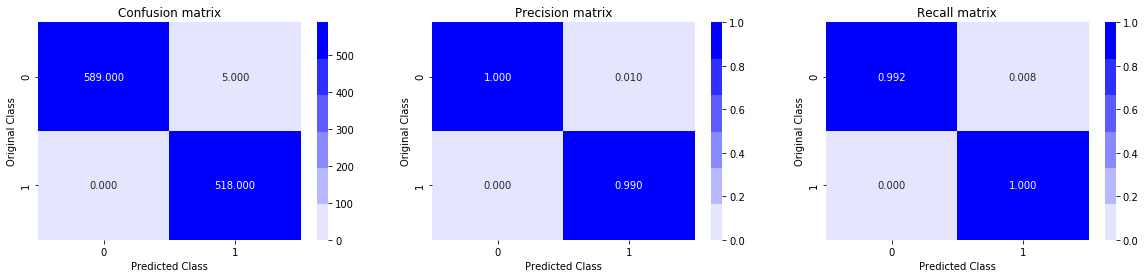

Test confusion_matrix


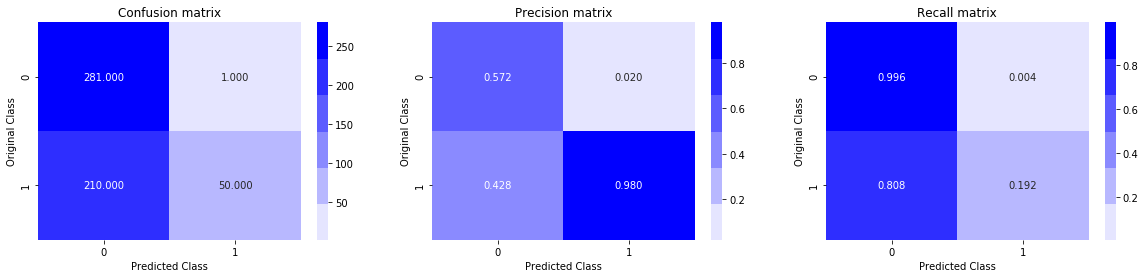

In [15]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

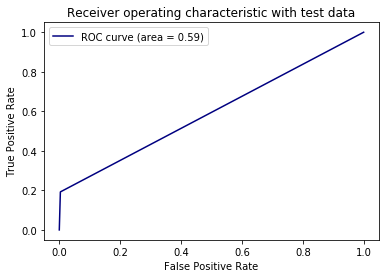

In [16]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

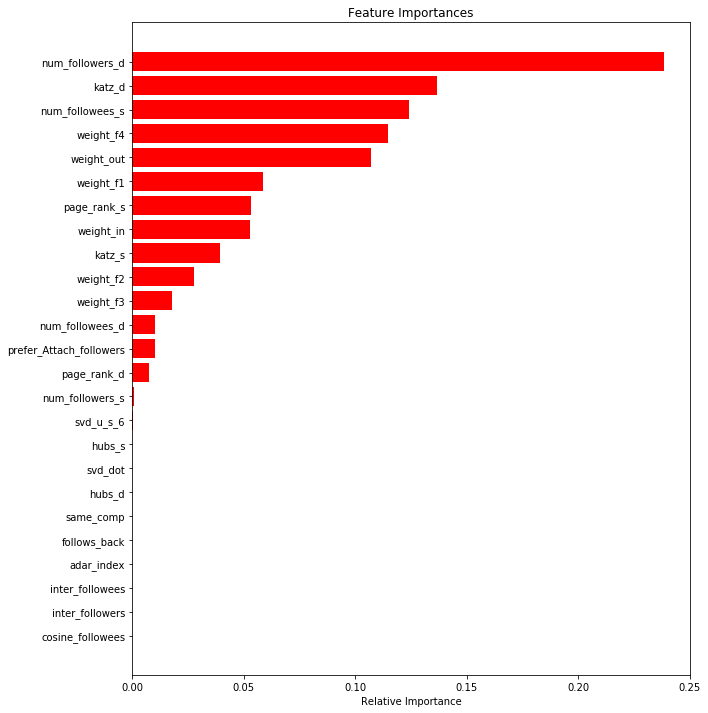

In [17]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
import xgboost as xgb

Depths = [1,2,3,4]


clf = xgb.XGBClassifier()

param_grid = {'max_depth':Depths}

model = RandomizedSearchCV(clf, param_distributions=param_grid,
                                   cv=2,scoring='f1',random_state=25,return_train_score=True)


model.fit(df_final_train,y_train)


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'

In [19]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)


In [20]:
# Optimal value of depth
optimal_depth_xgb = model.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth_xgb)

"""
optimal_learning_rate = clf.best_estimator_.learning_rate
print("\nThe optimal value of learning rate is : ",optimal_learning_rate)


optimal_reg_lambda = clf.best_estimator_.reg_lambda
print("\nThe optimal value of learning rate is : ",optimal_reg_lambda)
"""
#optimal_learners_data = optimal_learners
optimal_depth_data_xgb = optimal_depth_xgb
#optimal_learning_rate_data = optimal_learning_rate
#optimal_reg_lambda_data = optimal_reg_lambda



The optimal value of depth is :  1


In [21]:
clf = xgb.XGBRegressor(max_depth = int(optimal_depth_xgb))
clf.fit(df_final_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [22]:

y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [23]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred.round()))
print('Test f1 score',f1_score(y_test,y_test_pred.round()))

xgb_train_f1_score = f1_score(y_train,y_train_pred.round())
xgb_test_f1_score = f1_score(y_test,y_test_pred.round())

Train f1 score 0.9866666666666666
Test f1 score 0.31481481481481477


Train confusion_matrix


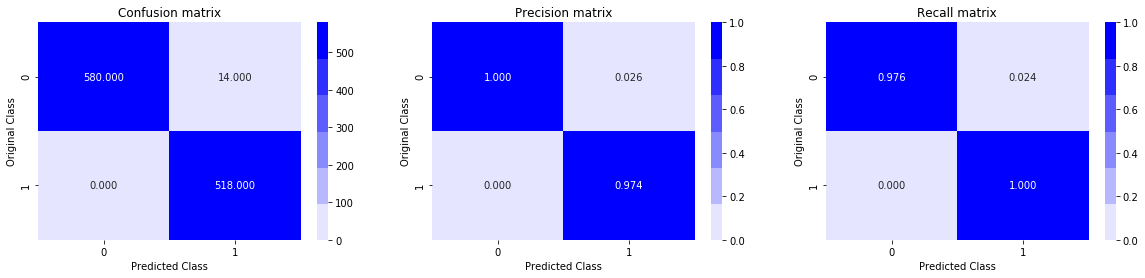

Test confusion_matrix


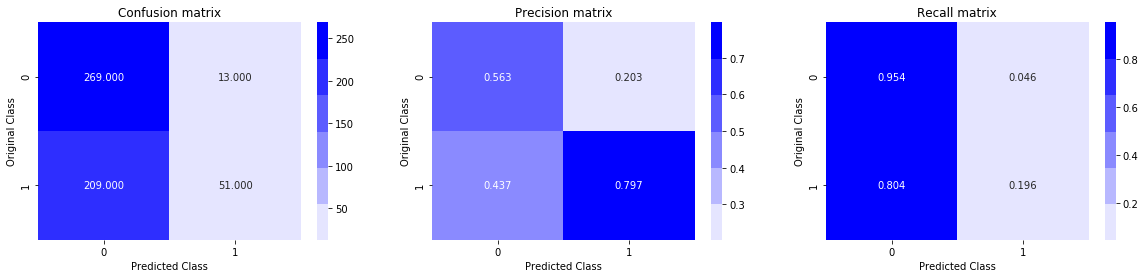

In [24]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred.round())
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred.round())

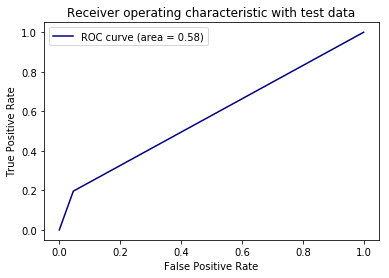

In [25]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred.round())
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

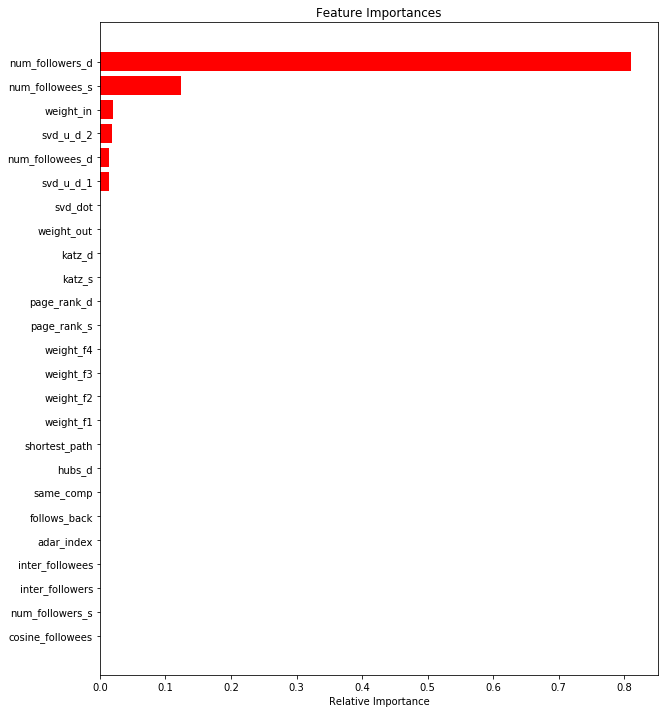

In [26]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Procedure and Observation

In [27]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest',optimal_depth_ran,ran_train_f1_score,ran_test_f1_score])
x.add_row(['XGBOOST',optimal_depth_xgb,xgb_train_f1_score,xgb_test_f1_score])
print(x)


+---------------+-----------+--------------------+---------------------+
|     Model     | max_depth |   Train f1-Score   |    Test f1-Score    |
+---------------+-----------+--------------------+---------------------+
| Random Forest |     12    | 0.9951969260326609 |  0.3215434083601286 |
|    XGBOOST    |     1     | 0.9866666666666666 | 0.31481481481481477 |
+---------------+-----------+--------------------+---------------------+


as per above chart, will consider model "XGBOOST" model, because it has less Train f1_score and Test f1_score.     

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.